## Problem Statement 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1008]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

###  Load data

In [1009]:
df = pd.read_csv("day.csv")

## Overview and Summary statistics

In [1010]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1011]:
df.shape

(730, 16)

In [1012]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1013]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [1014]:
print("Numerical cols : {}".format(df._get_numeric_data().columns))
print("Categorical cols : {}".format(set(df.columns) - set(df._get_numeric_data().columns)))

Numerical cols : Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Categorical cols : {'dteday'}


In [1015]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inference from overview
- there are no missing values
- 730 rows, 16 columns
- some of the categorical columns like season, whethersit are marked numerical
- we can drop columns 
    - instant : because it is an index and doesn't affect any other variable
    - dteday : is of type date, we already have month, weekend, weekday, workingday, holiday information
    - casual and registered : target variable cnt captures this info
    - either temp or atemp
- categorical variables
    - season
    - mnth
    - holiday
    - weekday
    - weathersit
    - yr
- numerical variables
    - temp
    - atemp
    - hum
    - windspeed
- target variable : cnt

In [1016]:
df.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)

## Visualize numerical relationship
- numerical cols : ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
- categorical cols : ['season', 'mnth', 'holiday', 'weekday', 'weathersit','yr']

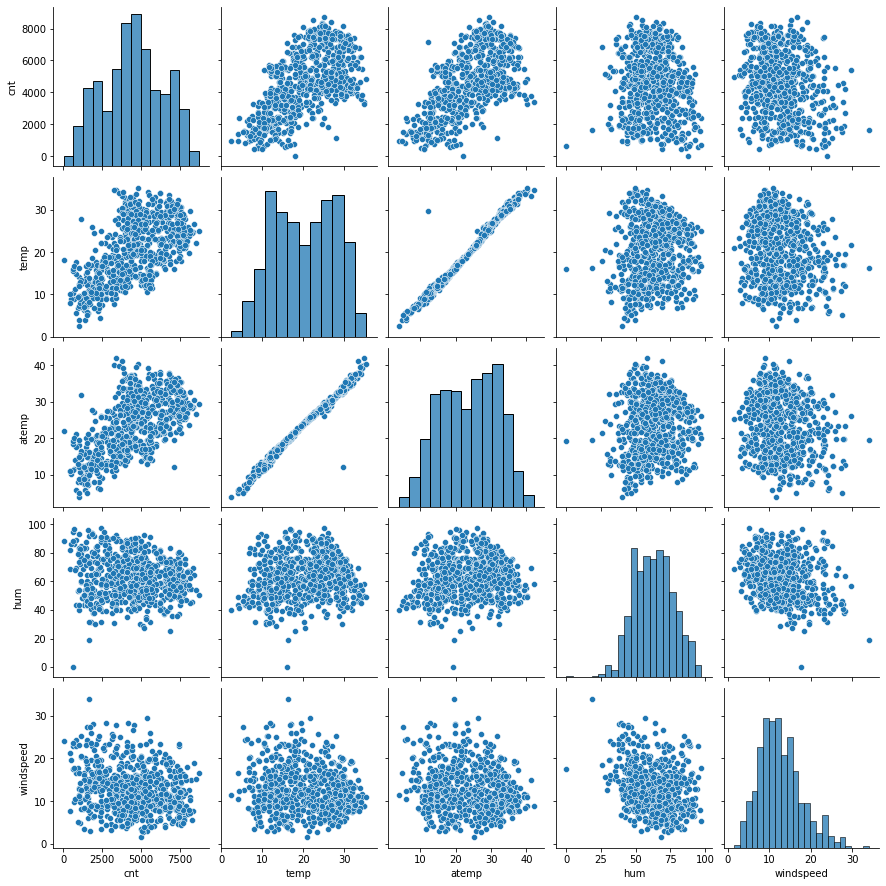

In [1017]:
numerical_cols =  ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
sns.pairplot(df[numerical_cols])

### Inference
- we see a linear relationship between count of total rental bikes and temperature

## Visualize categorical relationship

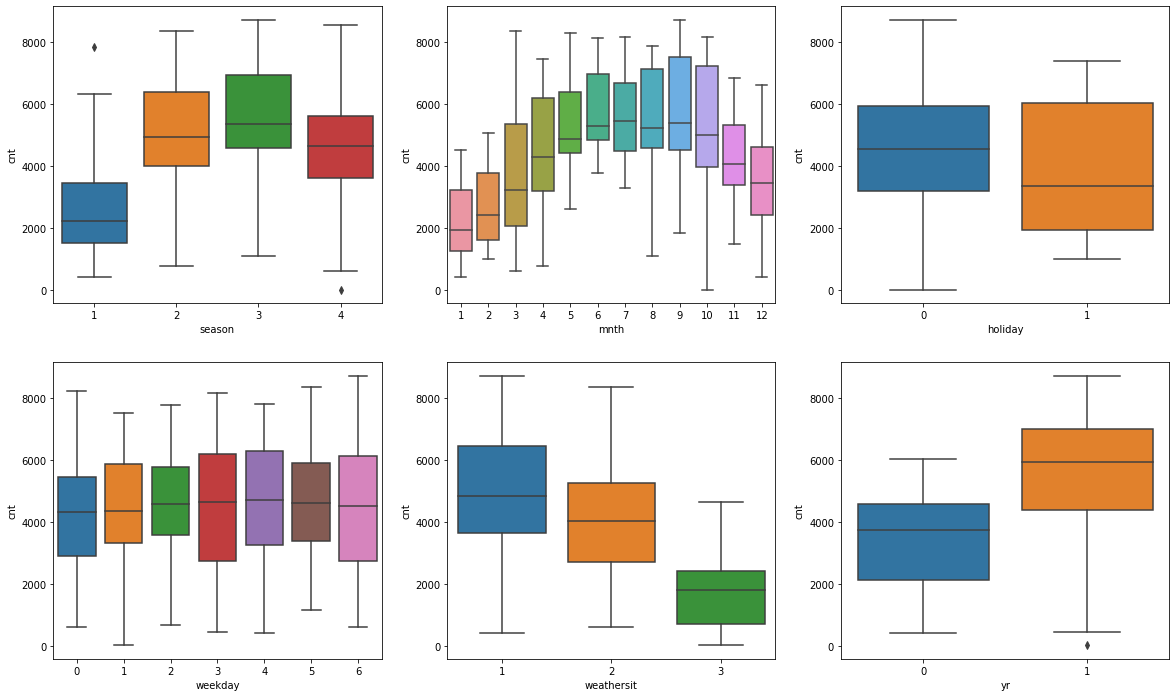

In [1018]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

### Inference
There is a higher count of bike rentals for 
- seasons summer and fall
- months May to October
- working day (may be because bikes are used for commute)
- clear weather or few clouds
- in year 2019

## Prepare data for modelling

### Replace numerical values to categories

In [1019]:
# replace month number to month name
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

# replace season number to season name
df['season'] = df['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

# replace weekday number with weekday name
df['weekday'] = df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

## mapping weather number with weather name
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Mist / Cloudy', 
                                             3:'Light Snow / Light Rain',4:'Heavy Rain'})

In [1020]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist / Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist / Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1021]:
# encode catefgorical features
df_categorical = df[['mnth', 'season', 'weekday','weathersit']]
categorical_dummies = pd.get_dummies(df_categorical, drop_first=True)

# append to original dataframe
df = pd.concat([df, categorical_dummies], axis = 1)

# drop non-encoded categorical columns
df.drop(['mnth', 'season', 'weekday','weathersit'] ,axis = 1,inplace = True)

In [1022]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow / Light Rain,weathersit_Mist / Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


##  Perform the test-train split and scale the features

In [1023]:
# test-train split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# scale numerical features, categorical features are already 0 and 1

scaler = MinMaxScaler()
num_cols = ['temp','atemp','hum','windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_cols])
df_train.head()                             

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow / Light Rain,weathersit_Mist / Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,0,0,0,0,1


## Visualize correlations

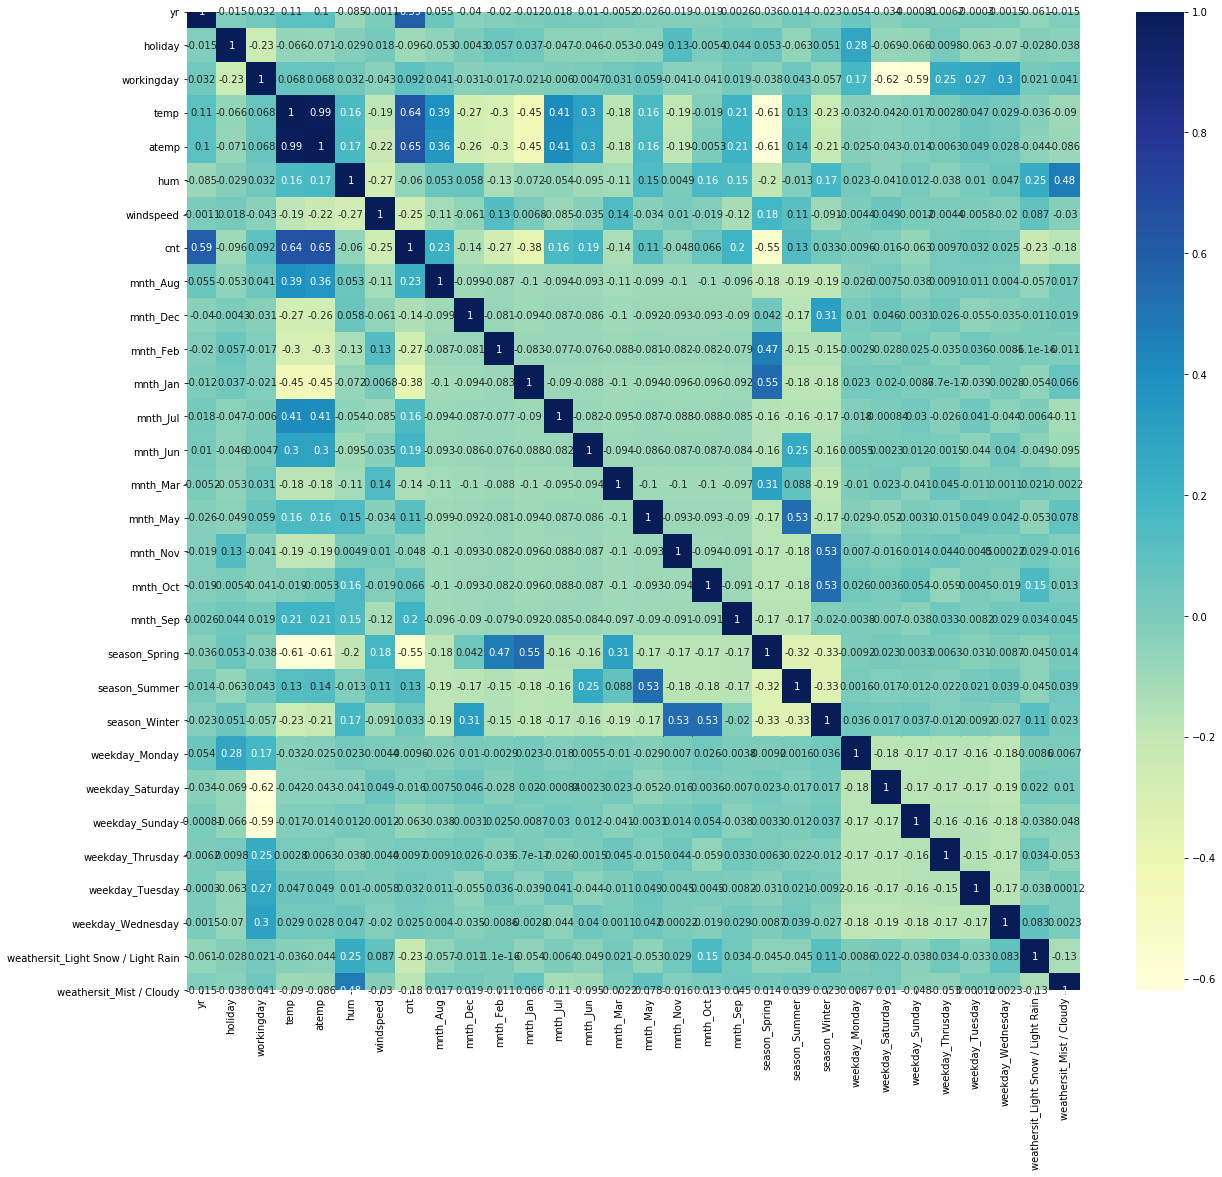

In [1024]:
num_cols = ['temp','atemp','hum','windspeed', 'cnt']

plt.figure(figsize = (20, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference from heatmap
- atemp and temp are highly correlated with value 0.99, basically same
- count is correlated with temperature
- month nov, dec correlated with season winter
- month may correlated with season summer, similarly spring with corresponding months
- humidity correlated with weather mist and cloudy

In [1025]:
df_train.shape

(510, 30)

## Build model
- We have 30 columns, we can start with RFE to select some columns and then remove non impacting featues 1 by 1

In [1026]:
y_train = df_train.pop("cnt")
X_train = df_train.copy()

In [1027]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


### Selecting top n features using RFE

Since our dataset is small we can create model of different number of features and compare the adjusted_r2_score

In [1028]:
num_feature_adjusted_r = {}

# iterate on feature count from 1 to 29
for num_features in range(29, 1, -1):
    
    # create linear regression object and fit training data
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    # create RFE object and fit training data
    rfe = RFE(lm, num_features)
    rfe = rfe.fit(X_train, y_train)
    
    col = X_train.columns[rfe.support_]
    X_train_rfe = X_train[col]

    # use statsmodel to get r2 score
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_rfe).fit()
    
    num_feature_adjusted_r[num_features] = lm.rsquared_adj
    

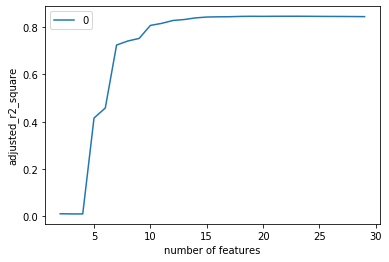

In [1029]:
feature_r2_df = pd.DataFrame.from_dict(num_feature_adjusted_r, orient='index')
plt.xlabel('number of features')
plt.ylabel('adjusted_r2_square')
sns.lineplot(data=feature_r2_df)

### Inference from the plot above
After feature count of 12 or 13 the adj_r2_score becomes constant so we can choose the feature count as 13

### Model 1

In [1030]:
num_features = 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, num_features)
rfe = rfe.fit(X_train, y_train)

### Columns rejected

In [1031]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'season_Summer',
       'season_Winter', 'weekday_Monday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Model statistics

In [1032]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train, X_train_rfe).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.27e-186
Time:                        21:14:36   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2831      0.024     11.725      0.000       0.236       0.331
yr                                     0.2330      0.008     28.198      0.000       0.217       0.249
holiday                                0.0065      0.022      0.303      0.762      -0.036       0.049
workingday                             0.1021      0.009     10.956      0.000       0.084       0.120
temp                                   0.3997      0.026     15.334      0.000       0.348       0.451
hum                                   -0.1140      0.038     -3.020      0.003      -0.188      -0.040
windspeed                             -0.1765      0.026     -6.800      0.000      -0.227      -0.125
mnth_Jul                              -0.0775      0.017     -4.444      0.000      -0.112      -0.043
mnth_Sep                               0.0574      0.016      3.640      0.000       0.026       0.088
season_Spring                         -0.1484      0.012    -12.198      0.000      -0.172      -0.124
weekday_Saturday                       0.1135      0.011      9.908      0.000       0.091       0.136
weekday_Sunday                         0.0610      0.012      5.061      0.000       0.037       0.085
weathersit_Light Snow / Light Rain    -0.2505      0.027     -9.314      0.000      -0.303      -0.198
weathersit_Mist / Cloudy              -0.0656      0.011     -6.162      0.000      -0.087      -0.045
==============================================================================
Omnibus:                       48.502   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.031
Skew:                          -0.520   Prob(JB):                     1.28e-24
Kurtosis:                       5.024   Cond. No.                     6.01e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1033]:
lm_1.rsquared_adj

0.8325390651438334

#### Check VIF (high VIC score, means feature can be derived from other features)

In [1034]:
X_train = X_train[list(X_train.columns[rfe.support_])]
X_train.shape

(510, 13)

In [1035]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,36.14
9,weekday_Saturday,8.81
10,weekday_Sunday,8.61
1,holiday,2.31
3,temp,2.09
4,hum,1.83
8,season_Spring,1.64
12,weathersit_Mist / Cloudy,1.54
6,mnth_Jul,1.30
11,weathersit_Light Snow / Light Rain,1.25


#### Dropping holiday as it has high P value of 0.762

In [1036]:
X_train_new = X_train.drop(['holiday'], axis = 1)

### Model 2

#### Create model after dropping holiday

In [1037]:
X_train_lm = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.27e-186
Time:                        21:14:36   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2896      0.039      7.475      0.000       0.213       0.366
yr                                     0.2330      0.008     28.198      0.000       0.217       0.249
workingday                             0.0956      0.026      3.655      0.000       0.044       0.147
temp                                   0.3997      0.026     15.334      0.000       0.348       0.451
hum                                   -0.1140      0.038     -3.020      0.003      -0.188      -0.040
windspeed                             -0.1765      0.026     -6.800      0.000      -0.227      -0.125
mnth_Jul                              -0.0775      0.017     -4.444      0.000      -0.112      -0.043
mnth_Sep                               0.0574      0.016      3.640      0.000       0.026       0.088
season_Spring                         -0.1484      0.012    -12.198      0.000      -0.172      -0.124
weekday_Saturday                       0.1070      0.028      3.868      0.000       0.053       0.161
weekday_Sunday                         0.0545      0.028      1.961      0.050      -0.000       0.109
weathersit_Light Snow / Light Rain    -0.2505      0.027     -9.314      0.000      -0.303      -0.198
weathersit_Mist / Cloudy              -0.0656      0.011     -6.162      0.000      -0.087      -0.045
==============================================================================
Omnibus:                       48.502   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.031
Skew:                          -0.520   Prob(JB):                     1.28e-24
Kurtosis:                       5.024   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF

In [1038]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.20
1,workingday,16.43
2,temp,13.02
4,windspeed,4.50
8,weekday_Saturday,4.42
9,weekday_Sunday,4.33
11,weathersit_Mist / Cloudy,2.18
0,yr,2.06
7,season_Spring,1.97
5,mnth_Jul,1.40


#### Dropping humidity as it has very high VIF of 24.62

In [1039]:
X_train_new.drop(['hum'], axis = 1, inplace=True)

### Model 3

#### Create model after dropping humidity

In [1040]:
X_train_lm = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.6
Date:                Wed, 05 May 2021   Prob (F-statistic):          7.44e-186
Time:                        21:14:36   Log-Likelihood:                 495.64
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     498   BIC:                            -916.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2187      0.031      7.039      0.000       0.158       0.280
yr                                     0.2355      0.008     28.425      0.000       0.219       0.252
workingday                             0.0970      0.026      3.681      0.000       0.045       0.149
temp                                   0.3869      0.026     14.922      0.000       0.336       0.438
windspeed                             -0.1530      0.025     -6.130      0.000      -0.202      -0.104
mnth_Jul                              -0.0719      0.017     -4.112      0.000      -0.106      -0.038
mnth_Sep                               0.0551      0.016      3.472      0.001       0.024       0.086
season_Spring                         -0.1462      0.012    -11.942      0.000      -0.170      -0.122
weekday_Saturday                       0.1096      0.028      3.931      0.000       0.055       0.164
weekday_Sunday                         0.0535      0.028      1.907      0.057      -0.002       0.109
weathersit_Light Snow / Light Rain    -0.2831      0.025    -11.403      0.000      -0.332      -0.234
weathersit_Mist / Cloudy              -0.0839      0.009     -9.494      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       52.459   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.682
Skew:                          -0.559   Prob(JB):                     1.03e-26
Kurtosis:                       5.093   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF

In [1041]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.80
1,workingday,10.39
3,windspeed,4.47
7,weekday_Saturday,3.09
8,weekday_Sunday,2.87
0,yr,2.06
6,season_Spring,1.91
10,weathersit_Mist / Cloudy,1.57
4,mnth_Jul,1.36
5,mnth_Sep,1.20


#### Dropping workingday as it has high VIF

In [1042]:
X_train_new.drop(['workingday'], axis = 1, inplace=True)

### Model 4

#### Create model after dropping workingday

In [1043]:
X_train_lm = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     241.8
Date:                Wed, 05 May 2021   Prob (F-statistic):          3.64e-184
Time:                        21:14:36   Log-Likelihood:                 488.80
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     499   BIC:                            -909.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3094      0.019     16.118      0.000       0.272       0.347
yr                                     0.2359      0.008     28.124      0.000       0.219       0.252
temp                                   0.3918      0.026     14.945      0.000       0.340       0.443
windspeed                             -0.1543      0.025     -6.104      0.000      -0.204      -0.105
mnth_Jul                              -0.0712      0.018     -4.024      0.000      -0.106      -0.036
mnth_Sep                               0.0516      0.016      3.216      0.001       0.020       0.083
season_Spring                         -0.1467      0.012    -11.842      0.000      -0.171      -0.122
weekday_Saturday                       0.0162      0.012      1.386      0.167      -0.007       0.039
weekday_Sunday                        -0.0399      0.012     -3.298      0.001      -0.064      -0.016
weathersit_Light Snow / Light Rain    -0.2792      0.025    -11.118      0.000      -0.329      -0.230
weathersit_Mist / Cloudy              -0.0821      0.009     -9.185      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       64.669   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.117
Skew:                          -0.663   Prob(JB):                     1.26e-34
Kurtosis:                       5.365   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF

In [1044]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,3.88
0,yr,2.03
5,season_Spring,1.53
9,weathersit_Mist / Cloudy,1.48
3,mnth_Jul,1.33
6,weekday_Saturday,1.21
4,mnth_Sep,1.20
7,weekday_Sunday,1.19
8,weathersit_Light Snow / Light Rain,1.06


### Final Model Charateristics
- P values of all features less than 0.05
- VIC score of all features below 5
- Adjusted r2_score is 0.826

## Resiudal analysis on train data
    - We see that error is normally distributed and mean is around 0

Text(0.5, 0, 'Errors')

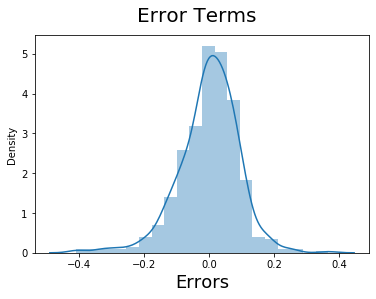

In [1045]:
y_train_cnt = lm_4.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Make predictions on test set

In [1046]:
df_test.shape

(219, 30)

### Data preprocessing on test data set

In [1047]:
# scale the numerical columns of test data
num_cols = ['temp','atemp','hum','windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_cols])

# split test data in X_test, y_test
y_test = df_test.pop('cnt')
X_test = df_test

# Now we now the important columns, so we filter out the columns of test data
X_test_m4 = sm.add_constant(X_test)
X_test_m4 = X_test[X_train_new.columns]
X_test_m4.head()

,yr,temp,windspeed,mnth_Jul,mnth_Sep,season_Spring,weekday_Saturday,weekday_Sunday,weathersit_Light Snow / Light Rain,weathersit_Mist / Cloudy
184,0,0.831783,0.084219,1,0,0,0,0,0,1
535,1,0.901354,0.153728,0,0,0,0,0,0,0
299,0,0.511964,0.334206,0,0,0,0,0,0,1
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0,0


In [1048]:
# make predictions using the final model
X_test_m4 = sm.add_constant(X_test_m4)
y_pred_m4 = lm_4.predict(X_test_m4)

### Evalute model

Text(0, 0.5, 'y_pred')

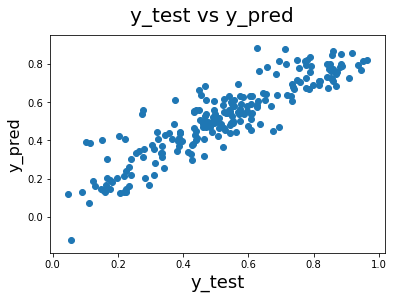

In [1049]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1050]:
# Calcuate r2_score
r2_score(y_test, y_pred_m4)

0.8051017541135568

### Conclusion

In [1051]:
# How variables are affecting the count of bike rentals

coeffs = pd.DataFrame(lm_4.params)
coeffs.rename(columns = {0: 'coefficient_value'}, inplace = True)
coeffs['coefficient_value'] = coeffs['coefficient_value'].apply(lambda x : round(x, 2))
coeffs.sort_values(by = 'coefficient_value', ascending = False, inplace = True)
coeffs

,coefficient_value
temp,0.39
const,0.31
yr,0.24
mnth_Sep,0.05
weekday_Saturday,0.02
weekday_Sunday,-0.04
mnth_Jul,-0.07
weathersit_Mist / Cloudy,-0.08
windspeed,-0.15
season_Spring,-0.15


$ bikeRentalsCount = 0.39  \times  temperature + 0.24  \times  year + 0.05 \times monthSep + 0.02 \times weekdaySaturday - 0.04 \times weekdaySunday - 0.07 \times monthJul - 0.08 \times weatherMist/Cloudy - 0.15 \times windspeed - 0.15 \times seasonSpring - 0.28 \times weatherLightSnow/Light Rain $

### Variables increasing bike rentals
- Temperature - more bike rentals in warmer weather
- Year - shows increase in demand happening year by year
- In Month Septemer bike rentals are more
- On Saturdays bike rentals are more

### Variables decreasing bike rentals
- Sunday has less bike rentals as people may rest
- July has less bike rentals probably because of weather
- Less bike rentals in spring season and when weather has mist, clouds, light rain and snow